## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

## Euclidean Distance $ d(x, y) = \sqrt{\sum_{i=1}^n{(y_{i} - x_{i})^2}}$

# Create some Data

In [3]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [4]:
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

# Visualize Data

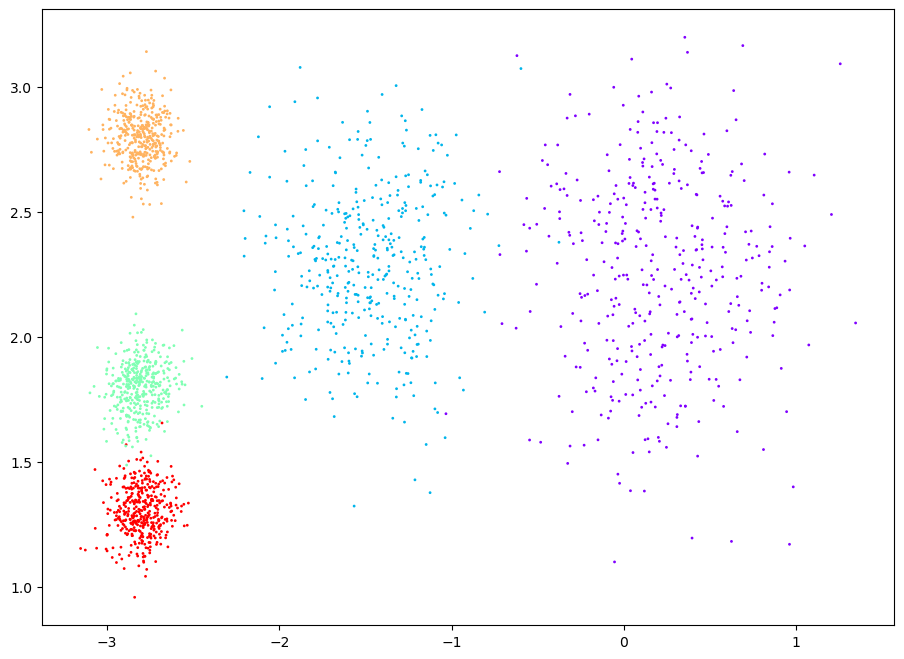

In [5]:
plt.figure(figsize=(11,8))
plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow', s=1)

# Creating the Clusters

In [6]:
kmeans = KMeans(n_clusters=5)

In [7]:
kmeans.fit(X)

KMeans(n_clusters=5)

In [8]:
kmeans.cluster_centers_

array([[-2.79290307,  2.79641063],
       [ 0.20876306,  2.25551336],
       [-2.80037642,  1.30082566],
       [-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999]])

In [9]:
kmeans.labels_

array([2, 4, 1, ..., 0, 1, 4])

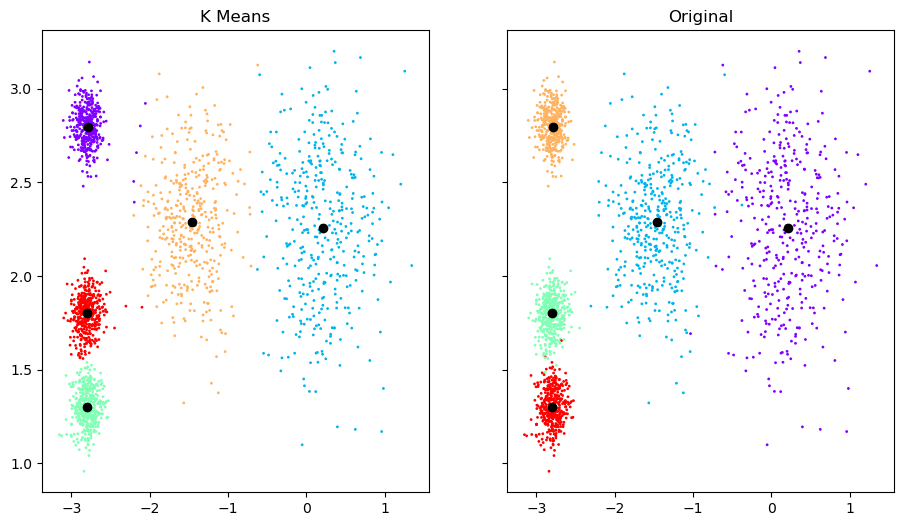

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(11,6))
ax1.set_title('K Means')
ax1.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow', s=1)
ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black')
ax2.set_title("Original")
ax2.scatter(X[:,0], X[:,1], c=y, cmap='rainbow', s=1)
ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black')

# Finding the Optimal Number of Clusters (Elbow Rule)

## Inertia $ = \sum_{i=1}^n{(x_{i} - C_{k})^2}$

In [11]:
inertia = []

for i in range(2, 11):
    
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

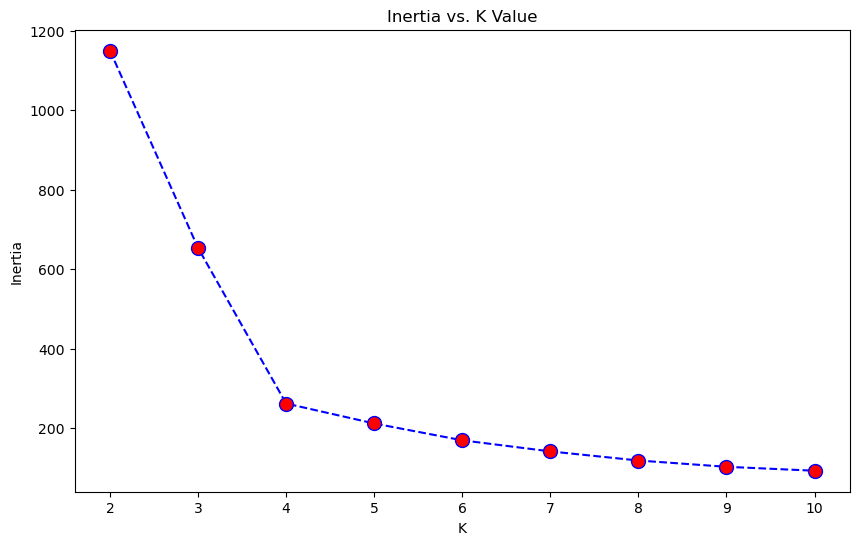

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Inertia vs. K Value')
plt.xlabel('K')
plt.ylabel('Inertia')

# Finding the Optimal Number of Clusters (Silhouette Coefficient)

## Silhouette Coefficient = $ \frac{(b – a)}{max(a, b)} $

In [13]:
silhouette = []

for i in range(2, 11):
    
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    silhouette.append(silhouette_score(X, kmeans.labels_))

Text(0, 0.5, 'Silhouette Score')

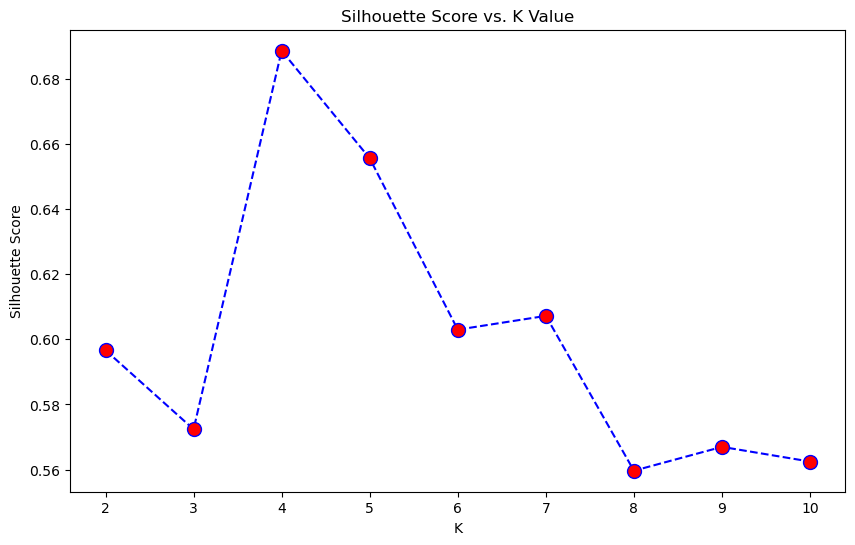

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Silhouette Score vs. K Value')
plt.xlabel('K')
plt.ylabel('Silhouette Score')

# Creating the Clusters with The Choosen K

In [15]:
kmeans = KMeans(n_clusters=4)

In [16]:
kmeans.fit(X)

KMeans(n_clusters=4)

In [17]:
kmeans.cluster_centers_

array([[-2.80214068,  1.55162671],
       [ 0.20876306,  2.25551336],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063]])

In [18]:
kmeans.labels_

array([0, 0, 1, ..., 3, 1, 0])

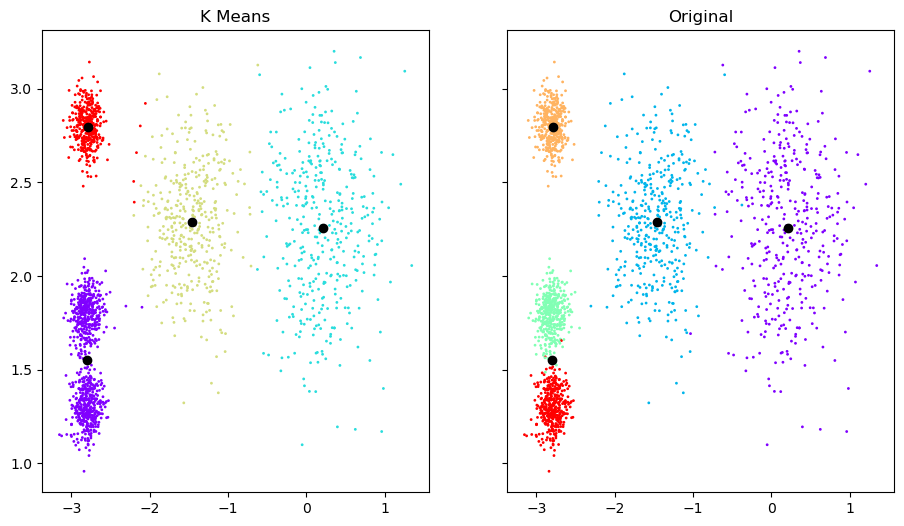

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(11,6))
ax1.set_title('K Means')
ax1.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow', s=1)
ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black')
ax2.set_title("Original")
ax2.scatter(X[:,0], X[:,1], c=y, cmap='rainbow', s=1)
ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black')